In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\sudha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_excel('realestate.xlsx')

In [3]:
data

,PRICE ($),SQFT,BED,BATH,FLOORS,DIST (km)
0,650000.0,1001,2,1,4,1.909
1,380000.0,735,1,1,13,0.128
2,602500.0,790,1,1,4,2.817
3,180000.0,413,0,1,3,2.360
4,320000.0,718,1,1,13,0.128
...,...,...,...,...,...,...
569,1100000.0,1804,2,2,8,2.031
570,550000.0,756,1,1,5,2.061
571,1025000.0,1814,2,3,16,2.439
572,862500.0,1496,2,2,16,2.439


# NULL VALUES CHECK

In [4]:
data.isnull().sum()

PRICE ($)    0
SQFT         0
BED          0
BATH         0
FLOORS       0
DIST (km)    0
dtype: int64

<span style="color:green;"><b>There are no null values in the dataset</span></b>

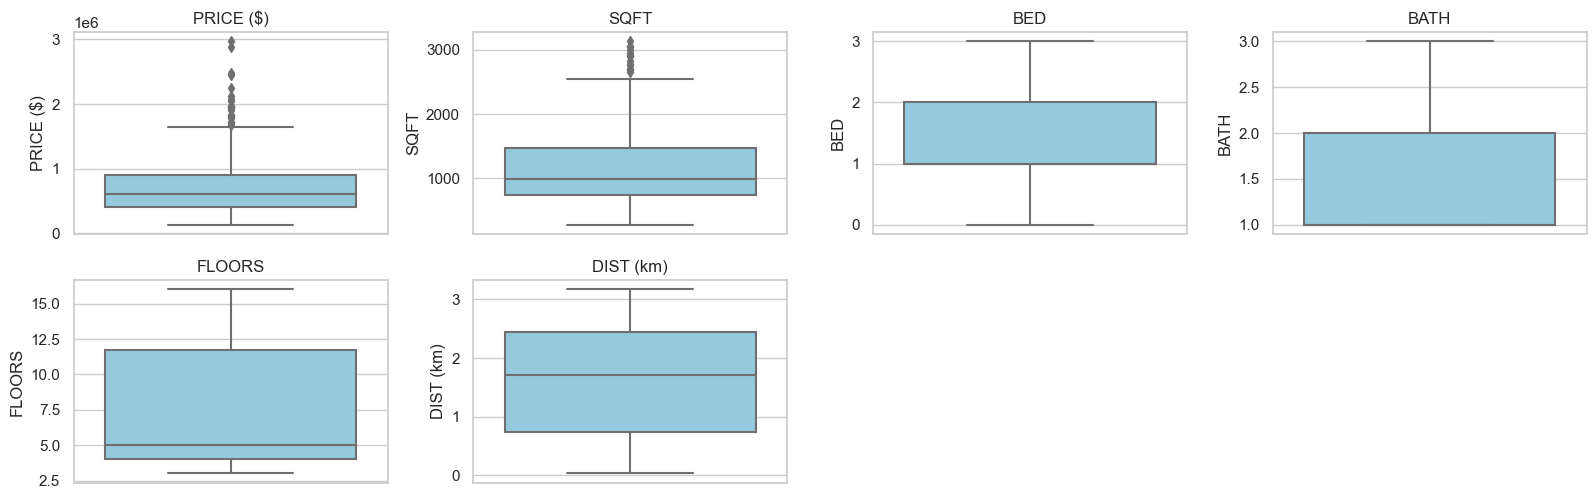

In [5]:
# Box Plots for Outliers
plt.figure(figsize=(16, 20))
sns.set(style='whitegrid')

num_rows = 8
num_cols = 4

for i, column in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<span style="color:red;"><b>We could see Outliers are present in columns PRICE and SQFT</span></b>

In [6]:
data.columns

Index(['PRICE ($)', 'SQFT', 'BED', 'BATH', 'FLOORS', 'DIST (km)'], dtype='object')

In [7]:
Q1 = data['PRICE ($)'].quantile(0.25)
Q3 = data['PRICE ($)'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers (1.5 times IQR above Q3)
upper_threshold = Q3 + 1.5 * IQR

# Filter out upper quantile outliers
filtered_data = data[data['PRICE ($)'] > upper_threshold]

In [8]:
data.head()

,PRICE ($),SQFT,BED,BATH,FLOORS,DIST (km)
0,650000.0,1001,2,1,4,1.909
1,380000.0,735,1,1,13,0.128
2,602500.0,790,1,1,4,2.817
3,180000.0,413,0,1,3,2.360
4,320000.0,718,1,1,13,0.128


In [9]:
filtered_data.head()

,PRICE ($),SQFT,BED,BATH,FLOORS,DIST (km)
18,1930000.0,1971,3,2,9,2.988
45,1835000.0,2703,3,3,16,2.012
63,1825000.0,2234,3,2,8,0.549
66,2075000.0,1806,3,2,9,2.988
67,1975000.0,3063,3,2,5,0.829


<b>From the data we can see there are expensive houses which are of higher square feet area and of high cost</b>
<b>These data are required so we cannot remove or transform them as it will affect the essence of the dataset so we can employ models which are insensitive to outliers</b>

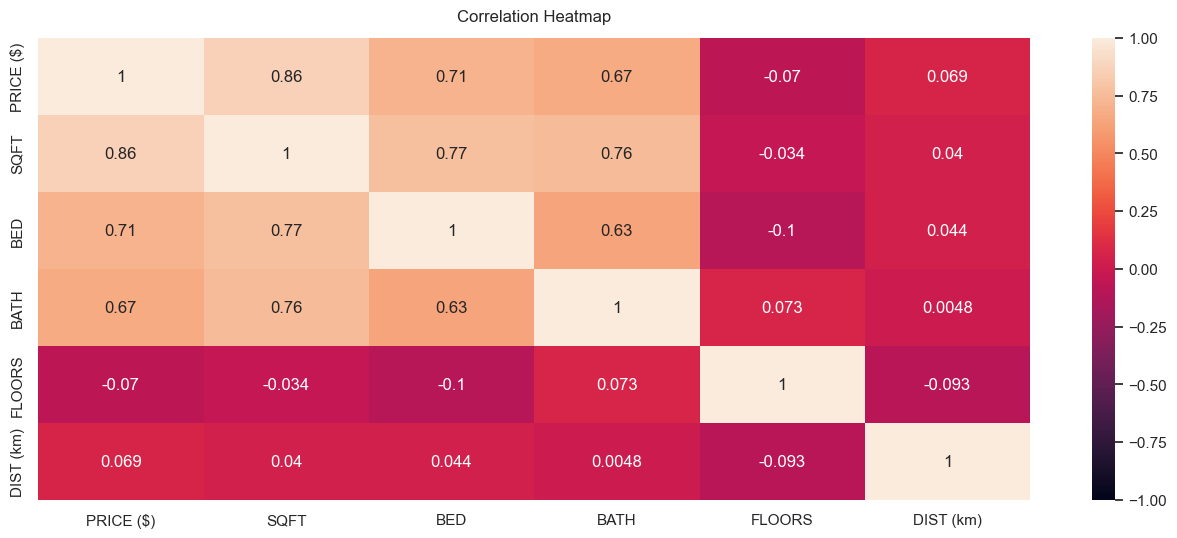

In [10]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<b>We could see the SQFT, BED and BATH are positively correlated with PRICE wheareas FLOORS is negatively correlated to PRICE

<b>SQFT is the most positive correlated feature for PRICE while FLOORS is the most negative correlated feature for PRICE
<b>DIST doesn't cause any significant impact to PRICE</b>

<AxesSubplot:xlabel='DIST (km)', ylabel='PRICE ($)'>

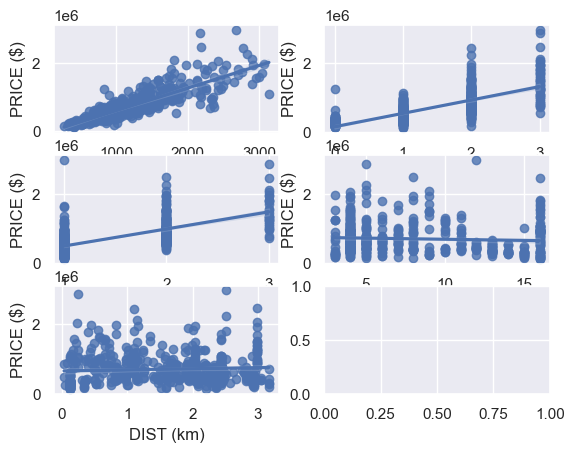

In [11]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3,2)

#create boxplot in each subplot
sns.regplot(data=data, x='SQFT', y='PRICE ($)', ax=axes[0,0])
sns.regplot(data=data, x='BED', y='PRICE ($)', ax=axes[0,1])
sns.regplot(data=data, x='BATH', y='PRICE ($)', ax=axes[1,0])
sns.regplot(data=data, x='FLOORS', y='PRICE ($)', ax=axes[1,1])
sns.regplot(data=data, x='DIST (km)', y='PRICE ($)', ax=axes[2,0])

<span style='color:green;'><b>We could prove the above inference by referring to the above plots</span></B>

# DESCRIPTION OF THE DATA

In [12]:
data.describe()

,PRICE ($),SQFT,BED,BATH,FLOORS,DIST (km)
count,5.740000e+02,574.000000,574.000000,574.000000,574.000000,574.000000
mean,7.097687e+05,1158.621951,1.423345,1.426829,7.726481,1.581291
std,4.293103e+05,560.896520,0.786144,0.582507,4.484617,0.945423
min,1.300000e+05,270.000000,0.000000,1.000000,3.000000,0.030000
25%,4.000000e+05,736.500000,1.000000,1.000000,4.000000,0.739500
50%,6.075000e+05,988.500000,1.000000,1.000000,5.000000,1.713500
75%,9.050000e+05,1467.750000,2.000000,2.000000,11.750000,2.439000
max,2.975000e+06,3139.000000,3.000000,3.000000,16.000000,3.171000


<b>SCALING THE DATASET</b>

In [13]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

In [14]:
data_scaled = rs.fit_transform(data)

# BUILDING BASE LINEAR REGRESSION MODEL

<b>TRAIN AND TEST SPLIT</b>

In [15]:
X = data.drop(['PRICE ($)'],1)
y = data['PRICE ($)']

C:\Users\sudha\AppData\Local\Temp\ipykernel_11412\299443970.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['PRICE ($)'],1)


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [19]:
lr_pred = lr.predict(X_test)

In [20]:
from sklearn import metrics

In [21]:
metrics.r2_score(y_test,lr_pred)

0.7706352100637419

In [22]:
lr.score(X_train,y_train)

0.7406951113070693

In [23]:
lr.score(X_test,y_test)

0.7706352100637419

<span style='color:blue;'><b>We could see the model is underfitting but only slightly wheareas the R2 score is good</b>
<span style='color:blue;'><b>This is expected as Linear Regression is more sensitive to Outliers we can try other models</b>

# OTHER MODELS

In [24]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [25]:
models = [('SVR', SVR()),
          ('Decision Tree', DecisionTreeRegressor()),
          ('Random Forest', RandomForestRegressor()),
          ('Gradient Boosting', GradientBoostingRegressor()),
          ('XGBoost', XGBRegressor()),
          ('AdaBoost', AdaBoostRegressor()),
          ('Bagging', BaggingRegressor()),
          ('CatBoost', CatBoostRegressor()),
         ]

In [26]:
results = []
for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2score = metrics.r2_score(y_test,y_pred)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    results.append((name,r2score,train_score,test_score))

Learning rate set to 0.035832
0:	learn: 416250.8104030	total: 134ms	remaining: 2m 14s
1:	learn: 407737.0929071	total: 135ms	remaining: 1m 7s
2:	learn: 399959.0946750	total: 136ms	remaining: 45.3s
3:	learn: 391927.7275280	total: 138ms	remaining: 34.3s
4:	learn: 384130.6101213	total: 139ms	remaining: 27.6s
5:	learn: 377092.0569307	total: 140ms	remaining: 23.1s
6:	learn: 369821.6971260	total: 141ms	remaining: 20s
7:	learn: 364152.3271989	total: 142ms	remaining: 17.6s
8:	learn: 358103.0915527	total: 143ms	remaining: 15.7s
9:	learn: 351396.0500591	total: 143ms	remaining: 14.2s
10:	learn: 344963.3843148	total: 144ms	remaining: 13s
11:	learn: 338623.8278985	total: 145ms	remaining: 11.9s
12:	learn: 332070.9132732	total: 146ms	remaining: 11.1s
13:	learn: 325938.2582007	total: 147ms	remaining: 10.3s
14:	learn: 320570.6537857	total: 148ms	remaining: 9.69s
15:	learn: 315428.2445893	total: 149ms	remaining: 9.13s
16:	learn: 310269.7629177	total: 149ms	remaining: 8.64s
17:	learn: 305153.1922916	total

289:	learn: 115062.5518902	total: 384ms	remaining: 939ms
290:	learn: 114938.8597843	total: 385ms	remaining: 937ms
291:	learn: 114842.5314218	total: 386ms	remaining: 935ms
292:	learn: 114682.4054432	total: 387ms	remaining: 933ms
293:	learn: 114570.5832108	total: 387ms	remaining: 930ms
294:	learn: 114440.4971367	total: 388ms	remaining: 928ms
295:	learn: 114320.3848482	total: 389ms	remaining: 926ms
296:	learn: 114191.2299815	total: 390ms	remaining: 923ms
297:	learn: 114045.1617606	total: 391ms	remaining: 921ms
298:	learn: 113887.5012717	total: 392ms	remaining: 919ms
299:	learn: 113774.5049513	total: 393ms	remaining: 916ms
300:	learn: 113654.6753689	total: 394ms	remaining: 914ms
301:	learn: 113455.3666985	total: 395ms	remaining: 912ms
302:	learn: 113304.9640916	total: 395ms	remaining: 910ms
303:	learn: 113122.5122410	total: 396ms	remaining: 908ms
304:	learn: 112947.1723084	total: 397ms	remaining: 905ms
305:	learn: 112816.7298779	total: 398ms	remaining: 903ms
306:	learn: 112698.8246733	tota

499:	learn: 94708.7276030	total: 571ms	remaining: 571ms
500:	learn: 94619.0437821	total: 572ms	remaining: 570ms
501:	learn: 94559.5076450	total: 573ms	remaining: 568ms
502:	learn: 94511.0791537	total: 574ms	remaining: 567ms
503:	learn: 94447.1961902	total: 575ms	remaining: 566ms
504:	learn: 94428.7510502	total: 576ms	remaining: 564ms
505:	learn: 94346.3497894	total: 576ms	remaining: 563ms
506:	learn: 94296.4507456	total: 577ms	remaining: 561ms
507:	learn: 94220.9959181	total: 578ms	remaining: 560ms
508:	learn: 94169.8216130	total: 579ms	remaining: 558ms
509:	learn: 94136.9290425	total: 580ms	remaining: 557ms
510:	learn: 94054.6464127	total: 580ms	remaining: 555ms
511:	learn: 93967.3893087	total: 581ms	remaining: 554ms
512:	learn: 93936.5633969	total: 582ms	remaining: 553ms
513:	learn: 93895.3728923	total: 583ms	remaining: 551ms
514:	learn: 93830.6015492	total: 584ms	remaining: 550ms
515:	learn: 93764.8884477	total: 585ms	remaining: 548ms
516:	learn: 93686.8010592	total: 586ms	remaining

726:	learn: 81629.5285521	total: 766ms	remaining: 288ms
727:	learn: 81612.4855040	total: 767ms	remaining: 287ms
728:	learn: 81535.6429932	total: 768ms	remaining: 285ms
729:	learn: 81469.7501047	total: 769ms	remaining: 284ms
730:	learn: 81423.2404390	total: 769ms	remaining: 283ms
731:	learn: 81369.2034792	total: 770ms	remaining: 282ms
732:	learn: 81364.1867556	total: 771ms	remaining: 281ms
733:	learn: 81353.5872721	total: 772ms	remaining: 280ms
734:	learn: 81330.8567090	total: 773ms	remaining: 279ms
735:	learn: 81326.2609159	total: 773ms	remaining: 277ms
736:	learn: 81262.8799479	total: 774ms	remaining: 276ms
737:	learn: 81249.5102216	total: 775ms	remaining: 275ms
738:	learn: 81213.1452722	total: 776ms	remaining: 274ms
739:	learn: 81176.4646664	total: 777ms	remaining: 273ms
740:	learn: 81173.2939750	total: 778ms	remaining: 272ms
741:	learn: 81169.0420062	total: 779ms	remaining: 271ms
742:	learn: 81127.8957272	total: 779ms	remaining: 270ms
743:	learn: 81124.1070668	total: 780ms	remaining

951:	learn: 73693.7578611	total: 956ms	remaining: 48.2ms
952:	learn: 73672.4210521	total: 957ms	remaining: 47.2ms
953:	learn: 73662.5768370	total: 958ms	remaining: 46.2ms
954:	learn: 73604.6101175	total: 959ms	remaining: 45.2ms
955:	learn: 73552.6050808	total: 960ms	remaining: 44.2ms
956:	learn: 73523.2517892	total: 961ms	remaining: 43.2ms
957:	learn: 73495.8363114	total: 962ms	remaining: 42.2ms
958:	learn: 73494.9302572	total: 963ms	remaining: 41.2ms
959:	learn: 73493.4031952	total: 963ms	remaining: 40.1ms
960:	learn: 73483.4770192	total: 964ms	remaining: 39.1ms
961:	learn: 73406.9839784	total: 965ms	remaining: 38.1ms
962:	learn: 73403.2701278	total: 966ms	remaining: 37.1ms
963:	learn: 73316.4536408	total: 967ms	remaining: 36.1ms
964:	learn: 73252.1597709	total: 968ms	remaining: 35.1ms
965:	learn: 73232.2688168	total: 969ms	remaining: 34.1ms
966:	learn: 73179.3700357	total: 970ms	remaining: 33.1ms
967:	learn: 73127.5219062	total: 971ms	remaining: 32.1ms
968:	learn: 73119.4524646	total

In [27]:
df_results = pd.DataFrame(results, columns=['Model','R2 Score','Train Score','Test Score'])

In [28]:
df_results = df_results.sort_values(by='R2 Score',ascending=False)

df_results

,Model,R2 Score,Train Score,Test Score
2,Random Forest,0.818698,0.959100,0.818698
6,Bagging,0.799147,0.948449,0.799147
7,CatBoost,0.792988,0.970911,0.792988
3,Gradient Boosting,0.777993,0.936215,0.777993
4,XGBoost,0.743633,0.988889,0.743633
5,AdaBoost,0.732312,0.833537,0.732312
1,Decision Tree,0.650779,0.989346,0.650779
0,SVR,-0.092143,-0.051513,-0.092143


<b>We could see that Random Forest and Bagging are performing well but they are Overfitting, this overfitting will be prevented by employing hyper parameter tuning</b>

# HYPER PARAMETER TUNING

TUNING BAGGING REGRESSOR

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Finding optimal parameters for Bagging Regressor
param_grid1 = {"n_estimators": range(5,20,2) ,  
              "max_samples": [0.05, 0.1, 0.2, 0.5]}
 

BR = GridSearchCV(BaggingRegressor(),param_grid=param_grid1,
                           cv = 5)
BR.fit(X,y)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': range(5, 20, 2)})

In [31]:
BR.best_params_

{'max_samples': 0.5, 'n_estimators': 15}

TUNING RANDOM FOREST REGRESSOR

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [35]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [33]:
models_tune = [('Random Forest', RandomForestRegressor(n_estimators=400,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=30,bootstrap=True)),
          ('Bagging', BaggingRegressor(max_samples=0.2,n_estimators=15))]

In [34]:
results_tune = []
for name, model in models_tune:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2score = metrics.r2_score(y_test,y_pred)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    results_tune.append((name,r2score,train_score,test_score))

In [35]:
results_tune_df = pd.DataFrame(results_tune,columns=['Model','R2 Score','Train Score','Test Score'])

In [36]:
results_tune_df = results_tune_df.sort_values(by='R2 Score',ascending=False)

In [37]:
results_tune_df

,Model,R2 Score,Train Score,Test Score
0,Random Forest,0.821353,0.918878,0.821353
1,Bagging,0.799608,0.826324,0.799608


We could see that Overfitting is somewhat improved after tuning the models

# NEURAL NETWORK MODEL

In [40]:
from keras.layers import Dense, Dropout
from keras import Sequential


model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear')) 
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              6000      
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 250)               125250    
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [41]:
from tensorflow.keras.losses import Huber

In [42]:
model.compile(optimizer='adam',loss=Huber(delta=5.0), metrics=['mae'])

In [43]:
model.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 10ms/step - loss: 3479903.7500 - mae: 695983.2500
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 3232415.5000 - mae: 646485.5625
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 2085714.6250 - mae: 417145.4062
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 899609.3750 - mae: 179924.3750
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 776810.4375 - mae: 155364.5938
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 768900.3750 - mae: 153782.5781
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 766037.6250 - mae: 153210.0625
Epoch 8/100
14/14 [==============================] - 0s 9ms/step - loss: 767939.0625 - mae: 153590.2969
Epoch 9/100
14/14 [==============================] - 0s 10ms/step - loss: 763792.5000 - mae: 152761.0000
Epoch 10/100
14/14 [==============================] - 0s

14/14 [==============================] - 0s 9ms/step - loss: 749608.6250 - mae: 149924.2188
Epoch 79/100
14/14 [==============================] - 0s 10ms/step - loss: 764393.3750 - mae: 152881.2031
Epoch 80/100
14/14 [==============================] - 0s 9ms/step - loss: 766474.2500 - mae: 153297.3438
Epoch 81/100
14/14 [==============================] - 0s 9ms/step - loss: 745971.1875 - mae: 149196.7656
Epoch 82/100
14/14 [==============================] - 0s 9ms/step - loss: 752284.8750 - mae: 150459.4688
Epoch 83/100
14/14 [==============================] - 0s 9ms/step - loss: 766564.3750 - mae: 153315.3750
Epoch 84/100
14/14 [==============================] - 0s 9ms/step - loss: 781382.9375 - mae: 156279.0625
Epoch 85/100
14/14 [==============================] - 0s 9ms/step - loss: 711818.6250 - mae: 142366.2344
Epoch 86/100
14/14 [==============================] - 0s 9ms/step - loss: 720887.4375 - mae: 144179.9844
Epoch 87/100
14/14 [==============================] - 0s 10ms/step 

In [44]:
nn_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [45]:
metrics.r2_score(y_test,nn_pred)

0.7479166798662356

In [46]:
model.evaluate(X_train,y_train)

14/14 [==============================] - 0s 2ms/step - loss: 676418.1875 - mae: 135286.1094


[676418.1875, 135286.109375]

In [47]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 756113.9375 - mae: 151225.2969


[756113.9375, 151225.296875]

<b>We could see the neural network model to be under performing, its because of the presence of outliers present to a larger extent, so we can consider Random Forest to be the best model in this scenario</b>